In [2]:
from memory_profiler import memory_usage
import time
import matplotlib.pyplot as plt
import random

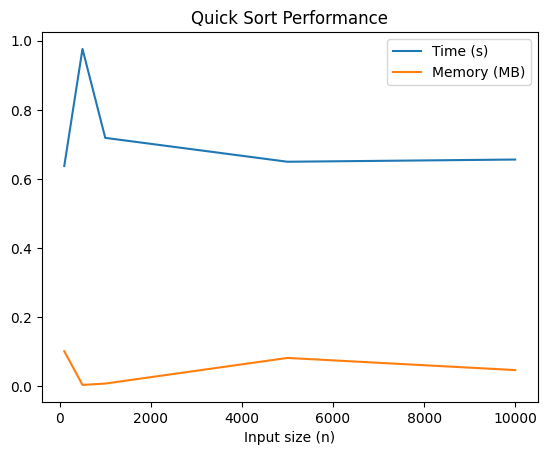

In [3]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def profile_quick_sort():
    sizes = [100, 500, 1000, 5000, 10000]
    times, mems = [], []

    for n in sizes:
        arr = random.sample(range(1, n*10), n)

        start = time.time()
        mem = memory_usage((quick_sort, (arr.copy(),)), max_iterations=1, interval=0.01)
        end = time.time()

        times.append(end - start)
        mems.append(max(mem) - min(mem))

    plt.plot(sizes, times, label="Time (s)")
    plt.plot(sizes, mems, label="Memory (MB)")
    plt.xlabel("Input size (n)")
    plt.legend()
    plt.title("Quick Sort Performance")
    plt.show()

profile_quick_sort()
